In [1]:
import pandas as pd
import numpy as np
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
r1 = 0.04097
r2 = 0.03654
r3 = 0.03487
r5 = 0.03470
r7 = 0.03567
r10= 0.03681
r30= 0.03994

In [3]:
t = np.array([1,2,3,5,7,10,30])
rate = [r1,r2,r3,r5,r7,r10,r30]

In [4]:
time = np.arange(1,31,1)
interpolate = interp1d(t,rate,kind='quadratic')
r = interpolate(time)

In [5]:
rates=r.copy()

In [6]:
def Price(FV,CR,N,Spot_rates):
    price=0
    coupon = FV *CR
    cashflows = [coupon]*(N-1) + [coupon+FV]
    for i in range(0,N):
        price = price + cashflows[i]/(1+Spot_rates[i])**(i+1)
    return price

In [7]:
def Derivative_dPdr(FV,CR,N,Spot_rates):
    Mac_numerator =0
    coupon = FV*CR
    cashflows = [coupon]*(N-1) + [coupon + FV]
    for i in range(0,N):
        Mac_numerator = Mac_numerator + (i+1)*cashflows[i]/(1+Spot_rates[i])**(i+1)
    return Mac_numerator

In [8]:
def Put_DV01(FV,CR,N,K,Spot_rates):
    dv=0
    pv=0
    coupon = FV*CR
    cashflows = [coupon]*(K-1) + [coupon + FV]
    put_rates = Spot_rates[K:N]
    for i in range(0,K):
        pv = pv + (i+1)*cashflows[i]/(1+put_rates[i])**(i+1)
    dv = pv/10000
    return dv

In [9]:
def DV01(FV,CR,N,K,Spot_rates):
    d=[]
    Dollar_dur=[]
    for i in range(0,N):
        p = Derivative_dPdr(FV,CR,N-i,Spot_rates)
        d.append(p)
    for j in range(0,N):
        dv = d[j]/10000
        Dollar_dur.append(dv)
    d_put = Put_DV01(FV,CR,N,K,Spot_rates)
    Dollar_dur = np.insert(Dollar_dur,K-1,d_put)
    return Dollar_dur       

           0
0   2.036094
1   1.994446
2   1.951925
3   1.908426
4   1.863843
5   1.818066
6   1.770983
7   1.722482
8   1.672447
9   1.620764
10  1.567316
11  1.511989
12  1.454669
13  1.395245
14  1.238668
15  1.333609
16  1.269658
17  1.203297
18  1.134437
19  1.063000
20  0.988920
21  0.912146
22  0.832641
23  0.750428
24  0.665665
25  0.578250
26  0.487786
27  0.394397
28  0.298330
29  0.200258
30  0.100867


<Axes: >

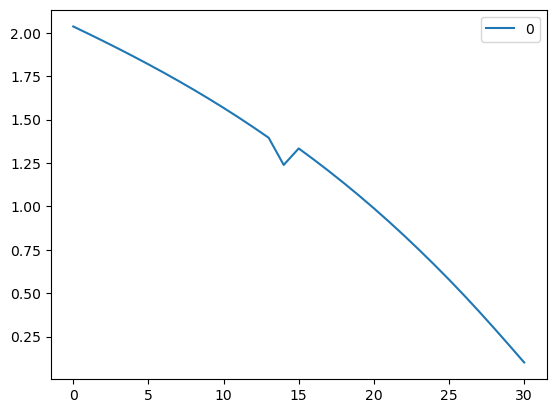

In [10]:
dd = DV01(1000,0.05,30,15,rates)
print(pd.DataFrame(dd))
pd.DataFrame(dd).plot()